# Gaussian processes

Gaussian processes (GPs) are an example of non-parametric Bayesian models. Non-parametric means the model has infinite parameters and does not rely on a specific functional form of the parameters. To specify a Gaussian process, one requires two things:
1. Mean vector.
2. Covariance matrix/Kernel: Relation of data points (samples) with one another.

The kernel or the covariance matrix represents the relation between the sample points, that is off-diagonal elements represent dependence of one observation on another. This makes GPs different from many other commonly used function approximators that typically assume *iid* samples. Like other kernel methods, GPs are *universal approximators* assuming the appropriate kernel for the data is being used. A commonly used kernel is the Radial Basis Function, 
$$
    k(x, x') = \exp \left( - \frac{||x - x'||^2}{2\ell^2}\right)
$$

where $\ell$ represents the smoothing length. 

Gaussian processes are different from Naive-Bayesian regression in that the Gaussian is defined over the space of functions rather than feature weights. GPs are great at quantifying uncertainty, for example in noisy time series data but are not clearly interpretable since they do not use explicit features. Another issue is the computational complexity of inverting the covariance matrix inversion, $n^3$ that has been addressed by more recent approaches.




References:
1. Self-contained discussion with python code: https://github.com/fonnesbeck/Bayes_Computing_Course/blob/master/notebooks/Section5_1-Gaussian_Processes.ipynb
2. scikit-learn: https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels
3. Application to dynamical systems: https://www.youtube.com/watch?list=PLFfvLE9TGnegjHFetV-zjPztaM_1UQk9B&v=BepKfyGbOM4&feature=emb_logo&ab_channel=WilWard
4. Broad overview: https://www.youtube.com/watch?v=U85XFCt3Lak&ab_channel=MLSSAfrica
5. pyro: https://pyro.ai/examples/gp.html
6. GPy: https://github.com/SheffieldML/GPy


## Gaussian processes using sklearn applied to candy dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## Load data

In [2]:
df = pd.read_csv('candy_production.csv')
df.columns = ['date', 'sales']
df.head()

,date,sales
0,1972-01-01,85.598809
1,1972-02-01,71.741404
2,1972-03-01,65.948809
3,1972-04-01,64.490724
4,1972-05-01,64.933842


In [3]:
X = np.atleast_2d(np.linspace(1, df.shape[0], df.shape[0])).T
y = df['sales'].values

X.shape, y.shape

((564, 1), (564,))

In [4]:
gp = GaussianProcessRegressor(kernel=RBF())
gp.fit(X, y)
y_pred, sigma = gp.predict(X, return_std=True)

Text(0, 0.5, '$f(x)$')

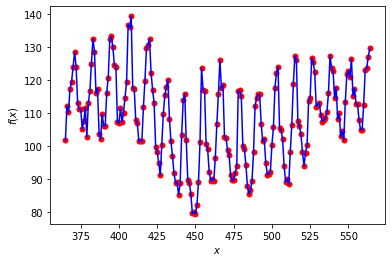

In [5]:
plt.figure()

plt.plot(X[-200:], y[-200:], 'r.', markersize=10, label='Observations')
plt.plot(X[-200:], y_pred[-200:], 'b-', label='Prediction')
plt.fill(np.concatenate([X[-200:], X[:-201:-1]]),
         np.concatenate([y_pred[-200:] - 1.9600 * sigma[-200:],
                        (y_pred[-200:] + 1.9600 * sigma[-200:])[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')